# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

In [2]:
from google.colab import files

# Upload files
uploaded = files.upload()


Saving ATnT.zip to ATnT (1).zip


In [3]:
import zipfile
import os

zip_file_path = 'ATnT.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

extracted_folder = os.path.splitext(zip_file_path)[0]
print(f'Extracted folder: {extracted_folder}')


Extracted folder: ATnT


#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [4]:
import os
import cv2
import numpy as np

images_folder = 'ATnT'

In [5]:

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join(images_folder, "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        if img is not None:
            allFaces.append(img)
            labels.append(i)
        else:
            print(f"Failed to load image: {imgPath}")


# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)

(360, 112, 92) (360,)


In [ ]:
labels

array([18,  9, 22, 35, 21, 17, 24, 28, 28, 30, 28, 33, 21, 20,  9,  1,  8,
       29, 37, 30,  5, 11, 39, 29,  4,  8, 17, 38, 17, 37, 35, 38,  5,  1,
       25, 12, 26, 40, 40, 26, 22, 35, 19, 23, 31, 39, 39, 16, 18,  4, 13,
        7,  8, 15,  2, 38, 26, 36, 17, 17, 37, 31,  8,  5, 29, 14, 12, 11,
       39, 26, 38, 23, 34, 21, 34, 20, 39, 39,  6, 34, 15, 16, 20, 16, 19,
       17,  5, 12,  6, 23, 38, 21, 30, 22,  7, 32, 38, 33, 14, 26, 14,  5,
       18, 19, 32, 33, 10, 10, 28, 19,  1, 38,  3,  2,  7, 38, 15, 37, 34,
       29, 36, 19, 25,  2,  8, 12,  7,  4, 39, 28, 23, 16, 34, 23, 24,  3,
       13, 38, 29, 33,  2, 17, 28, 18, 33, 33, 36, 33,  9, 18, 28, 17, 24,
       11, 24, 25, 13, 30, 33, 23, 12, 19, 15,  6, 14, 30, 37, 18, 21, 39,
       15, 10, 16, 34,  3,  1, 25, 12, 11,  8, 12, 11, 36, 22,  4,  7,  7,
       20, 23, 26, 29, 27, 32,  6,  4, 32, 37, 22, 10, 25, 40,  1, 35,  4,
       13, 18, 32, 36,  3,  9, 17,  6, 40, 10, 13, 19, 31, 27, 27,  1, 31,
       33,  3,  2, 11, 20

array([[120, 123, 119, ..., 114, 113, 115],
       [122, 122, 121, ..., 117, 114, 114],
       [121, 121, 120, ..., 114, 115, 114],
       ...,
       [121, 131, 138, ...,  98,  96, 101],
       [119, 131, 138, ...,  96,  94, 102],
       [115, 130, 132, ...,  96,  95, 103]], dtype=uint8)
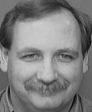

In [ ]:
allFaces[10]

array([[108, 110, 108, ..., 107, 105, 105],
       [110, 110, 110, ..., 108, 104, 106],
       [111, 107, 111, ..., 107, 108, 107],
       ...,
       [ 40,  40,  44, ...,  40,  36,  32],
       [ 44,  48,  52, ...,  26,  37,  36],
       [ 41,  47,  54, ...,  36,  35,  34]], dtype=uint8)
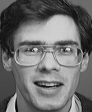

In [ ]:
trainFaces[0]

array([[144, 144, 145, ..., 145, 145, 145],
       [144, 145, 144, ..., 143, 146, 145],
       [145, 145, 145, ..., 145, 147, 143],
       ...,
       [153, 158, 186, ...,  81,  81,  79],
       [192, 216, 224, ...,  85,  80,  79],
       [226, 222, 223, ...,  76,  78,  82]], dtype=uint8)
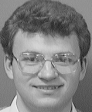

In [ ]:
testFaces[0]

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [6]:
def principalComponentAnalysis(X, numComponents):
    """
    Implement pca in the following function by taking the following arguements:
    1. X(images array)
    2. number of components
    The function must return the eigen vectors (principal components) also termed "Eigen faces"
    """
    num_samples, img_height, img_width = X.shape
    X_reshaped = X.reshape(num_samples, -1)

    mean_face = np.mean(X_reshaped, axis=0)

    centered_data = X_reshaped - mean_face

    covariance_matrix = np.cov(centered_data, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]

    eigenvectors = eigenvectors[:, :numComponents]

    return eigenvectors, mean_face

**Commented code for explanation**

In [ ]:
def principalComponentAnalysis(X, numComponents):
    # Get the dimensions of the images array
    num_samples, img_height, img_width = X.shape

    # Reshape the images array into a 2D array where each row represents an image
    X_reshaped = X.reshape(num_samples, -1)

    # Calculate the mean face by taking the mean across all images
    mean_face = np.mean(X_reshaped, axis=0)

    # Center the data by subtracting the mean face from each image
    centered_data = X_reshaped - mean_face

    # Compute the covariance matrix of the centered data
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues in descending order and rearrange eigenvectors accordingly
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]

    # Select the specified number of principal components
    eigenvectors = eigenvectors[:, :numComponents]

    # Return the principal components (eigenfaces) and the mean face
    return eigenvectors, mean_face


**Explanation of PCA:**

PCA is a dimensionality reduction technique commonly used in image processing and pattern recognition.
The goal of PCA is to reduce the dimensionality of the data while preserving as much of the variance as possible.
In the context of images, PCA can be used to extract the most important features (eigenfaces) from a set of face images.

Steps involved in PCA:

* Mean Centering: Subtract the mean of the data from each data point to center the data around the origin.

* Compute Covariance Matrix: Calculate the covariance matrix of the centered data.
* Eigenvalue Decomposition: Compute the eigenvalues and eigenvectors of the covariance matrix.

* Sort Eigenvalues: Sort the eigenvalues in descending order and rearrange the corresponding eigenvectors.

* Select Principal Components: Choose the top-k eigenvectors (principal components) corresponding to the largest eigenvalues.

* The resulting principal components (eigenfaces) represent the directions in the feature space along which the data varies the most.

In [ ]:
# plot the eigen faces
%matplotlib inline

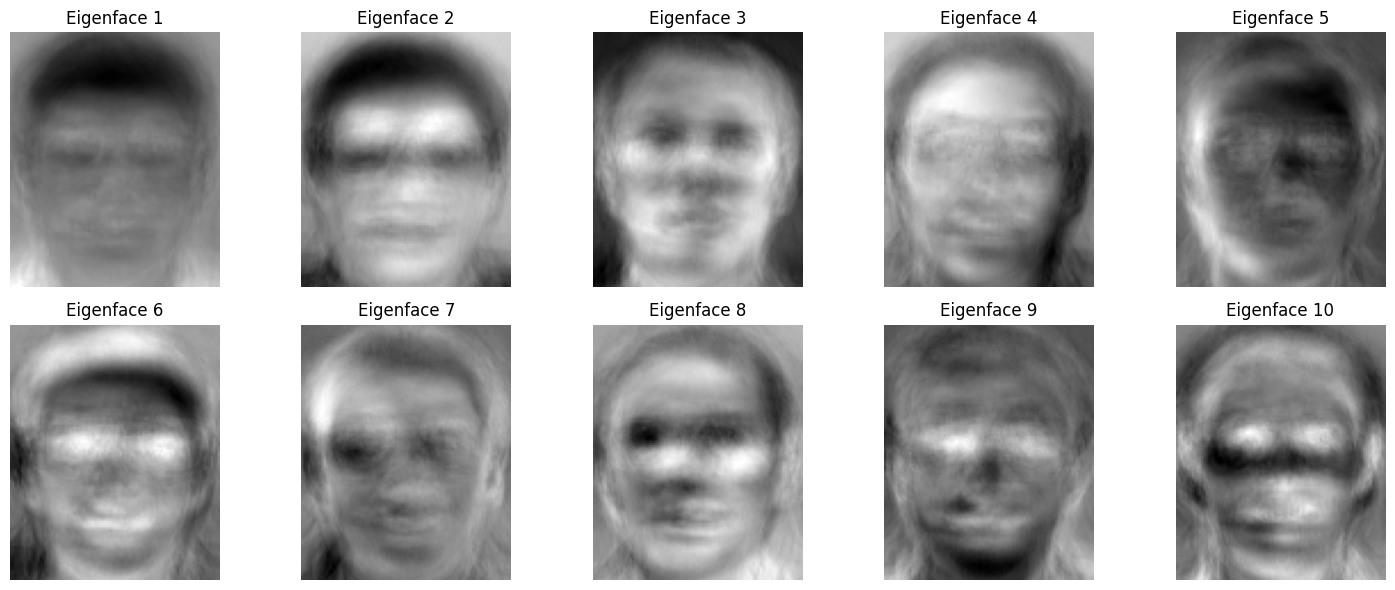

In [ ]:
eigenfaces, mean_face = principalComponentAnalysis(trainFaces, 10)

num_eigenfaces_to_display = 10
plt.figure(figsize=(15, 6))
for i in range(num_eigenfaces_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[:, i].reshape((112, 92)), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [11]:
def imageReconstruction(testFace, eigenFaces, meanFace):
    # Flatten the test face into a 1D array
    testFace_flat = testFace.flatten()

    # Center the test face by subtracting the mean face
    centered_testFace = testFace_flat - meanFace

    # Project the centered test face onto the eigenvectors (principal components)
    weights = np.dot(centered_testFace, eigenFaces)

    # Reconstruct the face using the weights and eigenfaces
    reconstructed_face = meanFace + np.dot(weights, eigenFaces.T)

    # Reshape the reconstructed face to its original dimensions
    reconstructed_face = reconstructed_face.reshape(testFace.shape)

    # Return the reconstructed face
    return reconstructed_face


**Explanation of Image Reconstruction using PCA:**

To reconstruct an image using PCA, we need the eigenfaces obtained from the training set along with the mean face.

Steps involved in image reconstruction:

Flatten the test face into a 1D array.

Center the test face by subtracting the mean face.

Project the centered test face onto the eigenvectors (principal components) to obtain the weights.

Reconstruct the face using the weighted sum of eigenfaces and add back the mean face.

Reshape the reconstructed face to its original dimensions.
The reconstructed face represents an approximation of the original face using a linear combination of the eigenfaces

In [ ]:
def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """
    testFace_flat = testFace.flatten()

    centered_testFace = testFace_flat - meanFace

    weights = np.dot(centered_testFace, eigenFaces)

    reconstructed_face = meanFace + np.dot(weights, eigenFaces.T)

    reconstructed_face = reconstructed_face.reshape(testFace.shape)

    return reconstructed_face


(-0.5, 91.5, 111.5, -0.5)

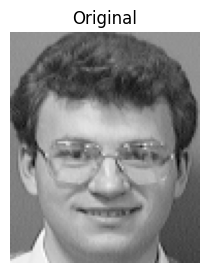

In [ ]:
test_face = testFaces[0]
num_components_list = [10]
plt.figure(figsize=(10, 3))
plt.subplot(1, len(num_components_list) + 1, 1)
plt.imshow(test_face, cmap='gray')
plt.title('Original')
plt.axis('off')

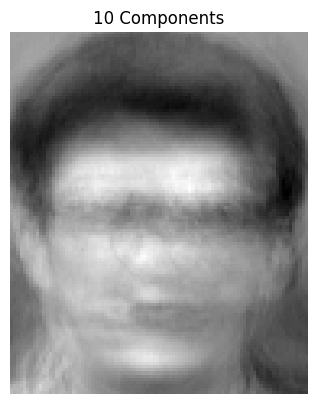

In [ ]:
reconstructed_face = imageReconstruction(test_face, eigenfaces, mean_face)

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face, cmap='gray')
plt.title(f'10 Components')
plt.axis('off')
plt.tight_layout()
plt.show()

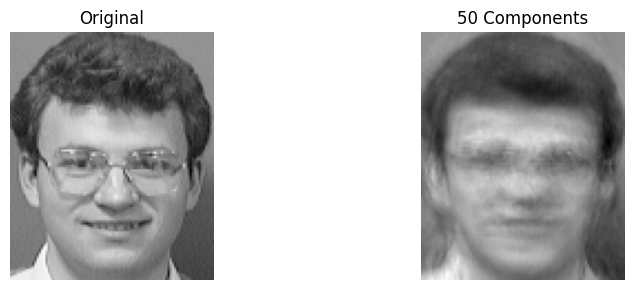

In [ ]:

reconstructed_faces = []

test_face = testFaces[0]

# num_components_list = [5, 10, 50, 100]  # List of number of components for reconstruction
num_components_list = [50]

plt.figure(figsize=(10, 3))
plt.subplot(1, len(num_components_list) + 1, 1)
plt.imshow(test_face, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, num_components in enumerate(num_components_list):
    eigenfaces, mean_face = principalComponentAnalysis(trainFaces, num_components)
    reconstructed_face = imageReconstruction(test_face, eigenfaces, mean_face)
    reconstructed_faces.append(reconstructed_face)

    plt.subplot(1, len(num_components_list) + 1, i + 2)
    plt.imshow(reconstructed_face, cmap='gray')
    plt.title(f'{num_components} Components')
    plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
np.mean((test_face - reconstructed_face) ** 2)

299.26200425051456

In [ ]:
def calculate_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

def calculate_psnr(original, reconstructed, max_pixel=255):
    mse = calculate_mse(original, reconstructed)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse))

In [ ]:
calculate_psnr(test_face, reconstructed_face, max_pixel=255)

23.370287806526377

In [ ]:
testFaces.shape

(40, 112, 92)

array([[144, 144, 145, ..., 145, 145, 145],
       [144, 145, 144, ..., 143, 146, 145],
       [145, 145, 145, ..., 145, 147, 143],
       ...,
       [153, 158, 186, ...,  81,  81,  79],
       [192, 216, 224, ...,  85,  80,  79],
       [226, 222, 223, ...,  76,  78,  82]], dtype=uint8)
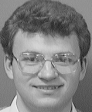

In [ ]:
testFaces[0]

In [ ]:
testLabels.shape

(40,)

In [ ]:
testLabels

array([ 6,  8, 36, 16, 37, 16, 35, 40, 19,  6,  9, 28, 38,  6, 37, 17,  8,
       21,  5, 27, 21, 17, 38, 19, 26, 14,  1, 31, 29, 13,  4, 15, 20, 10,
       20,  4, 28, 36, 26, 17])

In [ ]:
def predictClass(reconstructed_image, X_train, y_train):
    """
    Predict the class of the reconstructed image based on the nearest neighbor in the training set.
    """
    min_distance = float('inf')
    predicted_class = None

    for i, train_image in enumerate(X_train):
        distance = np.linalg.norm(reconstructed_image - train_image)
        if distance < min_distance:
            min_distance = distance
            predicted_class = y_train[i]

    return predicted_class

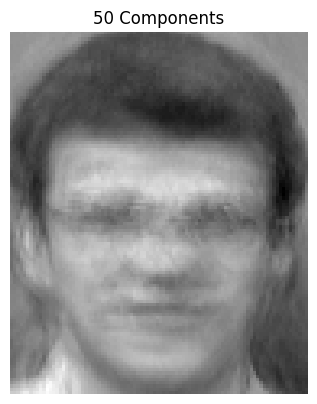

In [ ]:
plt.subplot(1, 1 + 1,  2)
plt.imshow(reconstructed_face, cmap='gray')
plt.title(f'{num_components} Components')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(predictClass(reconstructed_face, testFaces, testLabels))

6


#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

In [ ]:
def displayNfactors():

    reconstructed_faces = []

    test_face = testFaces[0]

    num_components_list = [5, 10, 50, 100]  # List of number of components for reconstruction

    plt.figure(figsize=(10, 3))
    plt.subplot(1, len(num_components_list) + 1, 1)
    plt.imshow(test_face, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    for i, num_components in enumerate(num_components_list):

        eigenfaces, mean_face = principalComponentAnalysis(trainFaces, num_components)

        reconstructed_face = imageReconstruction(test_face, eigenfaces, mean_face)
        reconstructed_faces.append(reconstructed_face)

        plt.subplot(1, len(num_components_list) + 1, i + 2)
        plt.imshow(reconstructed_face, cmap='gray')
        plt.title(f'{num_components} Components')
        plt.axis('off')

        psnr = calculate_psnr(test_face, reconstructed_face, max_pixel=255)

        print(num_components,psnr)
        print("\n")

    plt.tight_layout()
    plt.show()


    return None

5 17.759343221938305


10 18.28054748057508


50 20.886661589392986


100 21.722944605980032




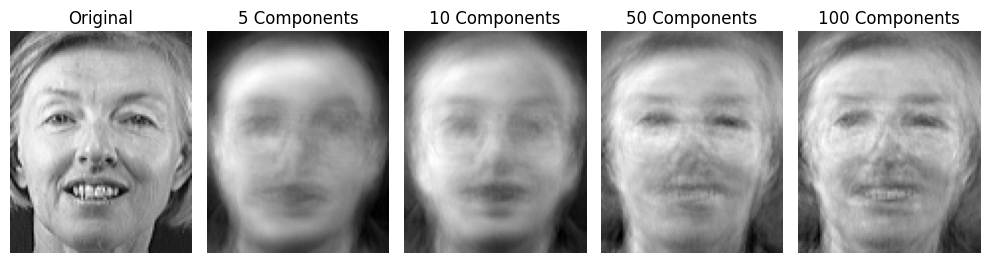

In [ ]:
displayNfactors()

In [ ]:
def displayNfactors():

    reconstructed_faces = []

    test_face = testFaces[0]

    num_components_list = [5, 10, 50, 100]  # List of number of components for reconstruction

    plt.figure(figsize=(10, 3))
    plt.subplot(1, len(num_components_list) + 1, 1)
    plt.imshow(test_face, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    for i, num_components in enumerate(num_components_list):

        eigenfaces, mean_face = principalComponentAnalysis(trainFaces, num_components)

        reconstructed_face = imageReconstruction(test_face, eigenfaces, mean_face)
        reconstructed_faces.append(reconstructed_face)

        plt.subplot(1, len(num_components_list) + 1, i + 2)
        plt.imshow(reconstructed_face, cmap='gray')
        plt.title(f'{num_components} Components')
        plt.axis('off')

        # psnr = calculate_psnr(test_face, reconstructed_face, max_pixel=255)
        mse = calculate_mse(test_face, reconstructed_face)
        print(num_components,mse)
        print("\n")

    plt.tight_layout()
    plt.show()


    return None

5 781.4032925906586


10 478.4140931363051


50 299.26200425051456


100 254.85762788586112




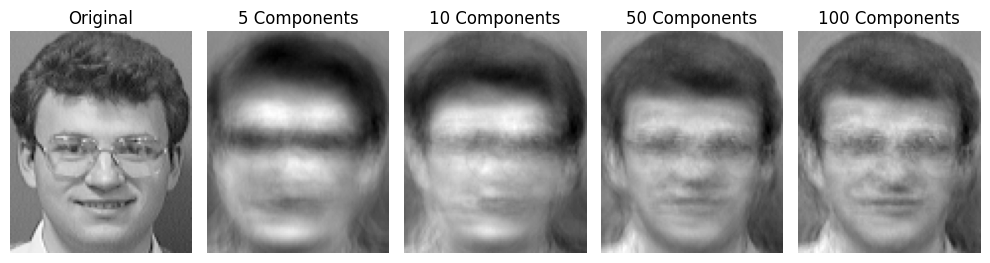

In [ ]:
displayNfactors()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:
def getClass():
    """
    Arguments:
    1. Test image
    2. Eigenvectors
    3. Mean Eigen Face
    4. Training Set(X_train,y_train)

    The function must return the following:
    1. image with smallest error
    2. error value
    3. prediction class
    """

    # your code here

    return None

To implement the face recognition module based on the provided norm-based approach, we will follow these steps:

* getClass Function: This function takes a test image and computes its reconstruction error for different numbers of principal components. It then predicts the class of the test image based on the nearest neighbor in the training set.

* predictClass Function: This function predicts the class of the reconstructed image based on the nearest neighbor in the training set.

* Testing and Accuracy Calculation: We will test the module by iterating over different numbers of principal components, reconstructing test images, predicting their classes, and calculating accuracies based on the predictions compared to the actual labels.

* Plotting: We will plot the accuracies against the number of components and also plot the mean square error vs the number of eigenvectors taken.

* Empirical Analysis: Observations will be made based on the plots.

In [9]:
import numpy as np

def getClass(test_image, eigenfaces, mean_face, X_train, y_train):
    """
    Arguments:
    1. test_image: Test image to be classified
    2. eigenfaces: Eigenvectors computed from the training set
    3. mean_face: Mean eigenface computed from the training set
    4. X_train: Training set images
    5. y_train: Labels corresponding to the training set images

    Returns:
    1. image with smallest error
    2. error value
    3. prediction class
    """

    min_error = float('inf')
    predicted_class = None
    best_reconstructed_image = None

    for num_components in range(1, len(eigenfaces) + 1):

        reconstructed_image = imageReconstruction(test_image, eigenfaces[:, :num_components], mean_face)

        error = np.mean((test_image - reconstructed_image) ** 2)

        if error < min_error:
            min_error = error
            predicted_class = predictClass(reconstructed_image, X_train, y_train)
            best_reconstructed_image = reconstructed_image

    return best_reconstructed_image, min_error, predicted_class

def predictClass(reconstructed_image, X_train, y_train):
    """
    Predict the class of the reconstructed image based on the nearest neighbor in the training set.
    """
    min_distance = float('inf')
    predicted_class = None

    for i, train_image in enumerate(X_train):
        distance = np.linalg.norm(reconstructed_image - train_image)
        if distance < min_distance:
            min_distance = distance
            predicted_class = y_train[i]

    return predicted_class


**commented code for explanation**

In [8]:
import numpy as np

def getClass(test_image, eigenfaces, mean_face, X_train, y_train):
    """
    Arguments:
    1. test_image: Test image to be classified
    2. eigenfaces: Eigenvectors computed from the training set
    3. mean_face: Mean eigenface computed from the training set
    4. X_train: Training set images
    5. y_train: Labels corresponding to the training set images

    Returns:
    1. image with smallest error
    2. error value
    3. prediction class
    """

    # Initialize variables
    min_error = float('inf')  # Initialize minimum error to infinity
    predicted_class = None     # Initialize predicted class to None
    best_reconstructed_image = None  # Initialize best reconstructed image to None

    # Loop through different number of components
    for num_components in range(1, len(eigenfaces) + 1):

        # Reconstruct the test image using the current number of components
        reconstructed_image = imageReconstruction(test_image, eigenfaces[:, :num_components], mean_face)

        # Calculate the mean squared error between the original and reconstructed images
        error = np.mean((test_image - reconstructed_image) ** 2)

        # Update minimum error and predicted class if current error is smaller
        if error < min_error:
            min_error = error
            predicted_class = predictClass(reconstructed_image, X_train, y_train)
            best_reconstructed_image = reconstructed_image

    # Return the best reconstructed image, minimum error, and predicted class
    return best_reconstructed_image, min_error, predicted_class

def predictClass(reconstructed_image, X_train, y_train):
    """
    Predict the class of the reconstructed image based on the nearest neighbor in the training set.
    """
    # Initialize variables
    min_distance = float('inf')  # Initialize minimum distance to infinity
    predicted_class = None        # Initialize predicted class to None

    # Iterate over training images and their labels
    for i, train_image in enumerate(X_train):
        # Calculate the Euclidean distance between the reconstructed image and each training image
        distance = np.linalg.norm(reconstructed_image - train_image)
        # Update minimum distance and predicted class if current distance is smaller
        if distance < min_distance:
            min_distance = distance
            predicted_class = y_train[i]

    # Return the predicted class for the reconstructed image
    return predicted_class


Iterate through all the images in the test data and test the accuracy by taking different number of components

Commented code for iterating over number of components

In [ ]:
components = [3,5,10,20,30,40,50]
mse = []

for numComponents in components:
  eigenfaces, mean_face = principalComponentAnalysis(trainFaces,numComponents)
  total_error = 0
  for i, test_image in enumerate(testFaces):
      reconstructed_image, error, predicted_class = getClass(test_image, eigenfaces, mean_face, testFaces, testLabels)
      total_error += error
  mse.append(total_error / len(testFaces))


array([[112.01286064, 112.73350969, 112.57345629, ..., 112.1487113 ,
        112.06051007, 112.36224764],
       [112.20734793, 112.48106745, 112.406042  , ..., 111.04204643,
        110.9310762 , 111.77258651],
       [111.21881281, 111.75700225, 112.17038723, ..., 110.66125787,
        111.56935985, 111.89663055],
       ...,
       [ 68.71806378,  74.83684734,  78.05082929, ...,  48.02424171,
         45.73580467,  43.65935533],
       [ 71.93869156,  72.72890493,  77.32706237, ...,  47.38821206,
         47.33586431,  43.76165634],
       [ 76.16396626,  77.60957264,  81.92079564, ...,  45.54714342,
         47.8631307 ,  45.41445393]])

Plot Number of eigenvectors vs Mean Square Error

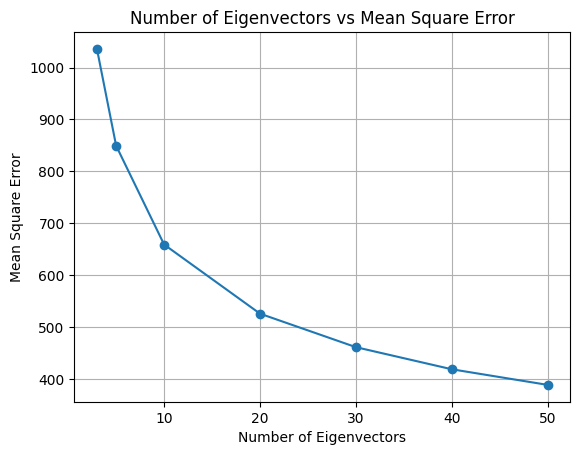

In [ ]:
plt.plot(components, mse, marker='o')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Mean Square Error')
plt.title('Number of Eigenvectors vs Mean Square Error')
plt.grid(True)
plt.show()

Plot Number of eigenvectors vs Logarithmic Mean Square Error

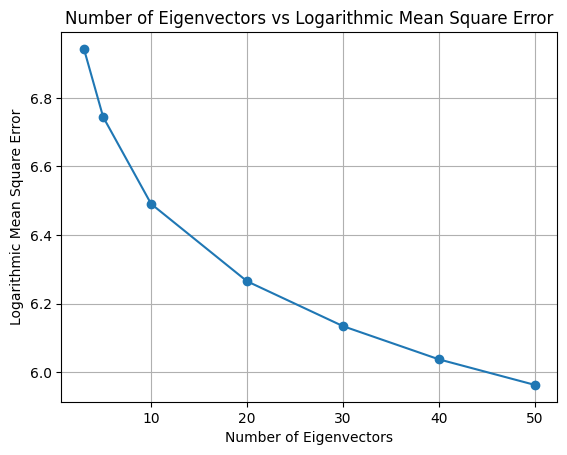

In [ ]:
plt.plot(components, np.log(mse), marker='o')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Logarithmic Mean Square Error')
plt.title('Number of Eigenvectors vs Logarithmic Mean Square Error')
plt.grid(True)
plt.show()

## **`FINAL`**

**Iterating over number of componenets with labels prediction along with both the plots**

For 3 components, predicted labels are: [23, 17, 3, 19, 13, 2, 26, 5, 19, 23, 30, 15, 30, 5, 37, 17, 1, 30, 5, 19, 30, 23, 30, 19, 5, 37, 18, 30, 30, 13, 3, 15, 30, 23, 30, 3, 15, 30, 5, 30]
For 5 components, predicted labels are: [6, 8, 3, 1, 37, 2, 26, 5, 19, 6, 30, 14, 38, 6, 37, 24, 8, 21, 5, 19, 21, 23, 38, 19, 26, 14, 1, 21, 30, 13, 3, 15, 23, 23, 30, 3, 19, 30, 26, 24]
For 10 components, predicted labels are: [6, 8, 7, 16, 37, 1, 25, 5, 19, 6, 9, 28, 38, 6, 37, 17, 8, 21, 5, 27, 21, 17, 38, 19, 26, 14, 1, 31, 29, 13, 25, 15, 38, 10, 29, 4, 28, 36, 26, 17]
For 20 components, predicted labels are: [6, 8, 7, 16, 37, 16, 35, 5, 19, 6, 9, 28, 38, 6, 37, 17, 8, 21, 5, 27, 21, 17, 38, 19, 26, 14, 1, 31, 29, 13, 4, 15, 20, 10, 29, 4, 28, 36, 26, 17]
For 30 components, predicted labels are: [6, 8, 36, 16, 37, 16, 35, 5, 19, 6, 9, 28, 38, 6, 37, 17, 8, 21, 5, 27, 21, 17, 38, 19, 26, 14, 1, 31, 29, 13, 4, 15, 20, 10, 20, 4, 28, 36, 26, 17]
For 40 components, predicted labels are: [6, 8, 36

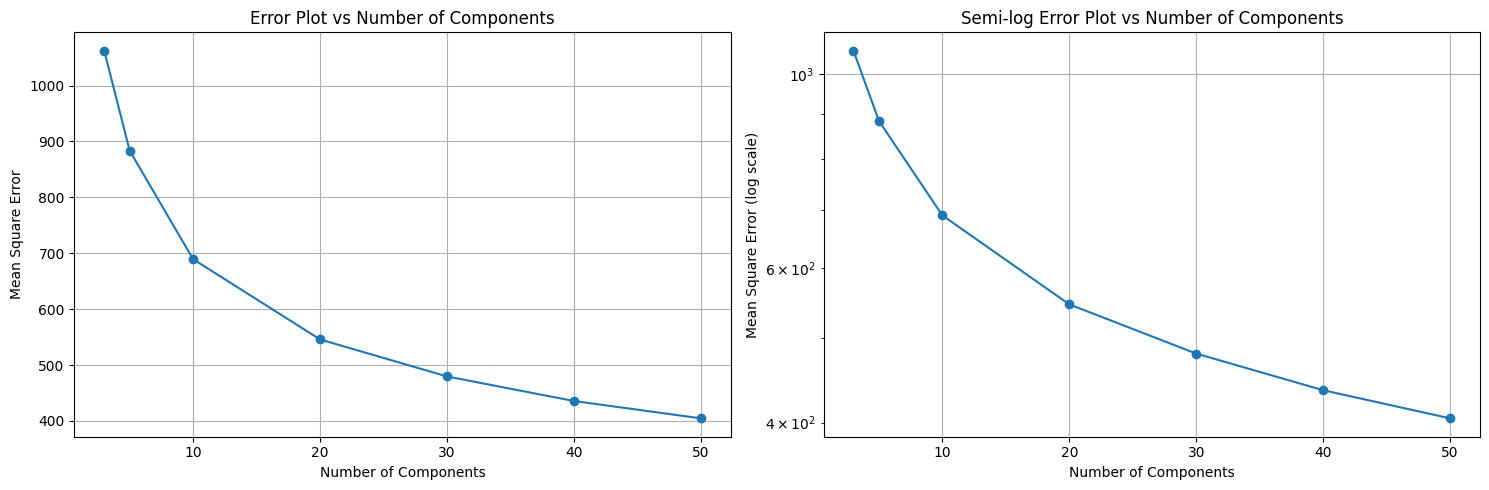

Mean Squared Error: [1062.2452588663689, 883.6103049384843, 689.343772921203, 545.7300356107924, 479.55528236348846, 435.5755311107535, 404.58771395260186]


In [ ]:
import matplotlib.pyplot as plt

components = [3, 5, 10, 20, 30, 40, 50]
mse = []
predicted_labels = []

for numComponents in components:
    eigenfaces, mean_face = principalComponentAnalysis(trainFaces, numComponents)
    total_error = 0
    predictions = []

    for i, test_image in enumerate(testFaces):
        reconstructed_image, error, predicted_class = getClass(test_image, eigenfaces, mean_face, trainFaces, trainLabels)
        total_error += error
        predictions.append(predicted_class)

    mse.append(total_error / len(testFaces))
    predicted_labels.append(predictions)

    print(f"For {numComponents} components, predicted labels are: {predictions}")

# Plotting
plt.figure(figsize=(15, 5))

# Regular Error Plot
plt.subplot(1, 2, 1)
plt.plot(components, mse, marker='o')
plt.title('Error Plot vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Error')
plt.grid(True)

# Semi-log Error Plot
plt.subplot(1, 2, 2)
plt.semilogy(components, mse, marker='o')
plt.title('Semi-log Error Plot vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Error (log scale)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Mean Squared Error:", mse)


In [ ]:
len(predicted_labels)

7

In [ ]:
len(predictions), testLabels.shape

(40, (40,))

For 3 components, predicted labels are: [5, 40, 15, 22, 30, 40, 30, 21, 3, 3, 40, 39, 5, 30, 5, 5, 6, 15, 30, 37, 40, 30, 40, 15, 2, 26, 23, 21, 13, 21, 15, 22, 13, 30, 24, 30, 18, 30, 30, 26]
For 5 components, predicted labels are: [5, 26, 27, 34, 33, 26, 30, 39, 3, 3, 5, 22, 5, 21, 5, 26, 6, 15, 30, 37, 40, 30, 40, 3, 27, 19, 23, 38, 26, 21, 15, 34, 13, 23, 24, 21, 18, 23, 30, 37]
For 10 components, predicted labels are: [5, 12, 11, 31, 33, 40, 29, 39, 4, 7, 5, 39, 5, 21, 5, 12, 6, 15, 30, 37, 40, 30, 12, 3, 19, 19, 23, 9, 28, 21, 5, 34, 13, 38, 24, 21, 12, 38, 30, 37]
For 20 components, predicted labels are: [5, 12, 11, 31, 33, 26, 29, 39, 3, 7, 5, 39, 26, 21, 5, 12, 6, 15, 30, 37, 40, 31, 12, 3, 11, 32, 23, 9, 28, 21, 5, 34, 13, 38, 24, 21, 12, 38, 30, 37]


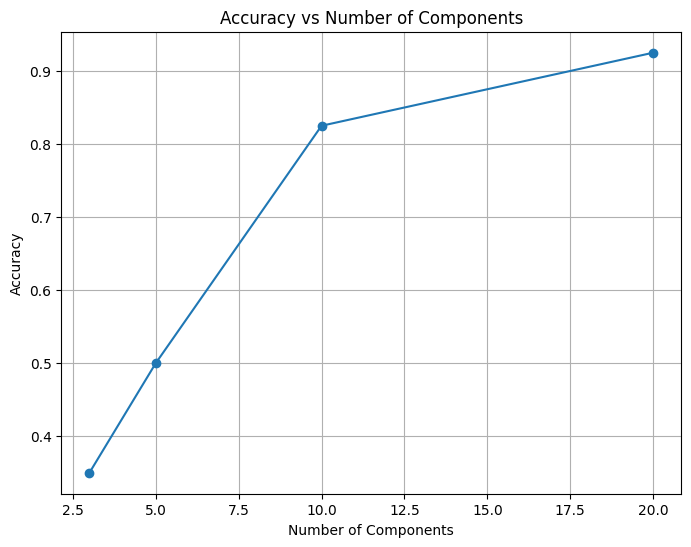

Accuracies: [0.35, 0.5, 0.825, 0.925]


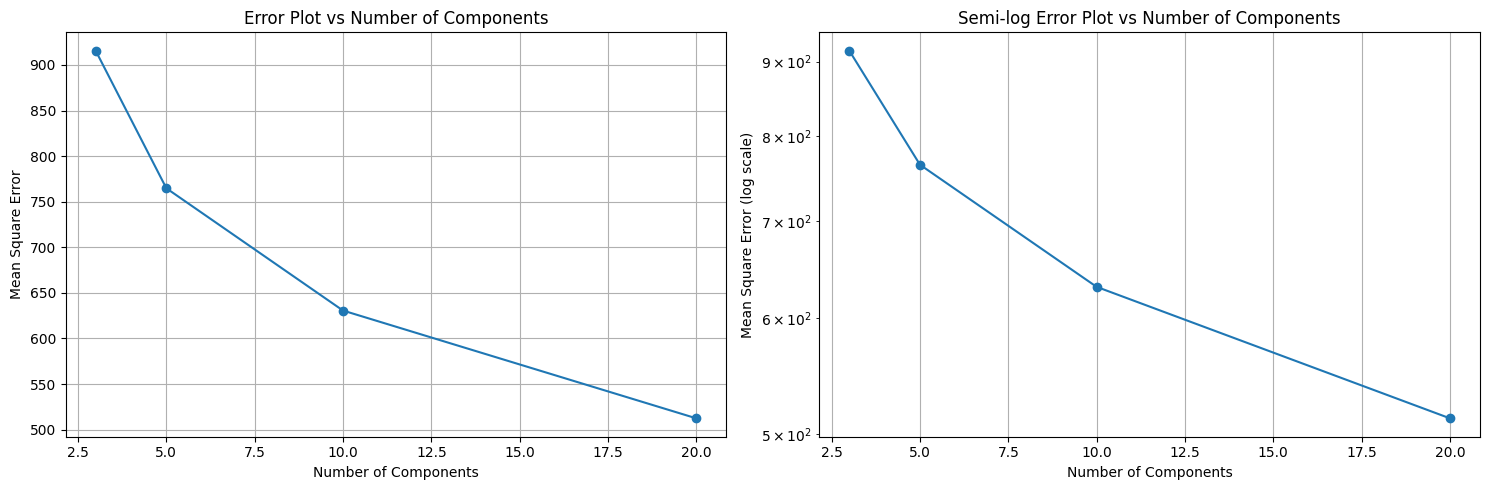

Mean Squared Error: [915.6354315500341, 764.7466370447158, 630.5981169510635, 512.3640707166468]


In [12]:
import matplotlib.pyplot as plt

components = [3, 5, 10, 20]
mse = []
predicted_labels = []

for numComponents in components:
    eigenfaces, mean_face = principalComponentAnalysis(trainFaces, numComponents)
    total_error = 0
    predictions = []

    for i, test_image in enumerate(testFaces):
        reconstructed_image, error, predicted_class = getClass(test_image, eigenfaces, mean_face, trainFaces, trainLabels)
        total_error += error
        predictions.append(predicted_class)

    mse.append(total_error / len(testFaces))
    predicted_labels.append(predictions)

    print(f"For {numComponents} components, predicted labels are: {predictions}")


accuracies = []

for predictions in predicted_labels:
    correct_predictions = sum(1 for true_label, pred_label in zip(testLabels, predictions) if true_label == pred_label)
    accuracy = correct_predictions / len(testLabels)
    accuracies.append(accuracy)

# Plotting accuracies
plt.figure(figsize=(8, 6))
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("Accuracies:", accuracies)
# Plotting
plt.figure(figsize=(15, 5))

# Regular Error Plot
plt.subplot(1, 2, 1)
plt.plot(components, mse, marker='o')
plt.title('Error Plot vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Error')
plt.grid(True)

# Semi-log Error Plot
plt.subplot(1, 2, 2)
plt.semilogy(components, mse, marker='o')
plt.title('Semi-log Error Plot vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Error (log scale)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Mean Squared Error:", mse)


For 3 components, predicted labels are: [5, 40, 15, 22, 30, 40, 30, 21, 3, 3, 40, 39, 5, 30, 5, 5, 6, 15, 30, 37, 40, 30, 40, 15, 2, 26, 23, 21, 13, 21, 15, 22, 13, 30, 24, 30, 18, 30, 30, 26]
For 5 components, predicted labels are: [5, 26, 27, 34, 33, 26, 30, 39, 3, 3, 5, 22, 5, 21, 5, 26, 6, 15, 30, 37, 40, 30, 40, 3, 27, 19, 23, 38, 26, 21, 15, 34, 13, 23, 24, 21, 18, 23, 30, 37]
For 10 components, predicted labels are: [5, 12, 11, 31, 33, 40, 29, 39, 4, 7, 5, 39, 5, 21, 5, 12, 6, 15, 30, 37, 40, 30, 12, 3, 19, 19, 23, 9, 28, 21, 5, 34, 13, 38, 24, 21, 12, 38, 30, 37]
For 20 components, predicted labels are: [5, 12, 11, 31, 33, 26, 29, 39, 3, 7, 5, 39, 26, 21, 5, 12, 6, 15, 30, 37, 40, 31, 12, 3, 11, 32, 23, 9, 28, 21, 5, 34, 13, 38, 24, 21, 12, 38, 30, 37]
For 30 components, predicted labels are: [5, 12, 11, 31, 33, 18, 29, 39, 3, 7, 5, 39, 26, 21, 5, 12, 6, 15, 30, 37, 40, 31, 12, 3, 11, 32, 23, 9, 28, 21, 5, 34, 13, 38, 24, 21, 12, 38, 30, 37]
For 40 components, predicted labels 

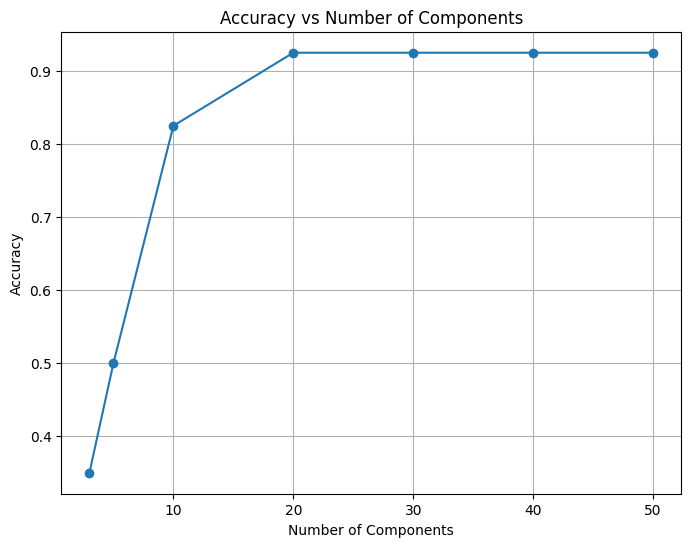

Accuracies: [0.35, 0.5, 0.825, 0.925, 0.925, 0.925, 0.925]


In [14]:
import matplotlib.pyplot as plt

components = [3, 5, 10, 20,30,40,50]
mse = []
predicted_labels = []

for numComponents in components:
    eigenfaces, mean_face = principalComponentAnalysis(trainFaces, numComponents)
    total_error = 0
    predictions = []

    for i, test_image in enumerate(testFaces):
        reconstructed_image, error, predicted_class = getClass(test_image, eigenfaces, mean_face, trainFaces, trainLabels)
        total_error += error
        predictions.append(predicted_class)

    mse.append(total_error / len(testFaces))
    predicted_labels.append(predictions)

    print(f"For {numComponents} components, predicted labels are: {predictions}")


accuracies = []

for predictions in predicted_labels:
    correct_predictions = sum(1 for true_label, pred_label in zip(testLabels, predictions) if true_label == pred_label)
    accuracy = correct_predictions / len(testLabels)
    accuracies.append(accuracy)

# Plotting accuracies
plt.figure(figsize=(8, 6))
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("Accuracies:", accuracies)



